In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
data = datasets.load_diabetes()

In [7]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [9]:
df['target'] = pd.Series(data.target)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [11]:
df[df.duplicated]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target


In [12]:
y = df['target']
X = df.drop('target', axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
gbr = GradientBoostingRegressor(n_estimators=500)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500)

In [38]:
y_pred = gbr.predict(X_test)
y_pred

array([166.03365693, 191.82224438, 180.27573143, 290.65238676,
       127.67110932, 107.76831562, 282.91665383, 224.00051554,
       170.54283741, 143.41724281,  96.9044102 , 202.59445605,
        89.96198984, 230.88215278, 109.29000776, 133.50448592,
       263.85414832, 265.93544633, 164.75460242, 234.16906658,
       182.62946598,  91.10900799,  55.05170795, 212.61464563,
       161.82918371, 176.66516711, 193.84270229, 189.80504468,
        82.81817097, 137.61001631, 153.7430294 , 146.52532578,
       134.73979486, 164.11411088, 122.50053199, 190.2519684 ,
        81.0695463 ,  87.67748893, 173.13851881,  66.99703021,
        57.68389521,  71.21985851, 171.00642425, 208.16461054,
       180.04261029,  75.72799629,  92.04553129, 132.86849525,
        71.95904234, 139.6703008 ,  86.76282217,  77.68514622,
       139.22420178, 104.10397087, 215.7234254 , 149.51634886,
        99.84986323, 249.6043331 ,  92.69850857,  80.49726732,
       179.3921805 , 183.6682787 , 117.35243013,  73.62

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [40]:
mae = mean_absolute_error(pred, y_test)
mae

45.94149948581794

In [41]:
feature_scores = pd.Series(gbr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

bmi    0.353719
s5     0.229300
bp     0.090023
s2     0.081207
age    0.059412
s1     0.051746
s6     0.050258
s3     0.042334
s4     0.029738
sex    0.012262
dtype: float64

<Axes: xlabel='None', ylabel='None'>

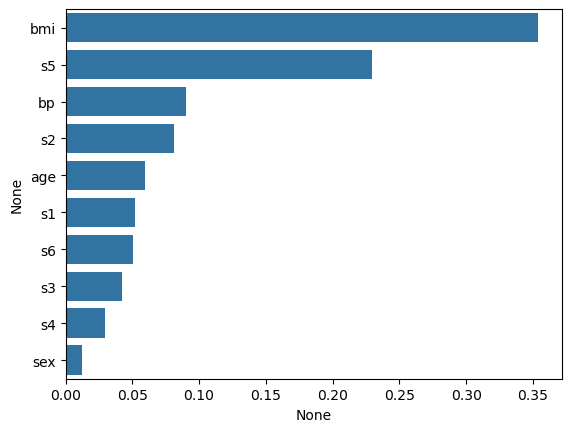

In [42]:
sns.barplot(x=feature_scores, y=feature_scores.index)

In [51]:
from sklearn.metrics import mean_squared_error

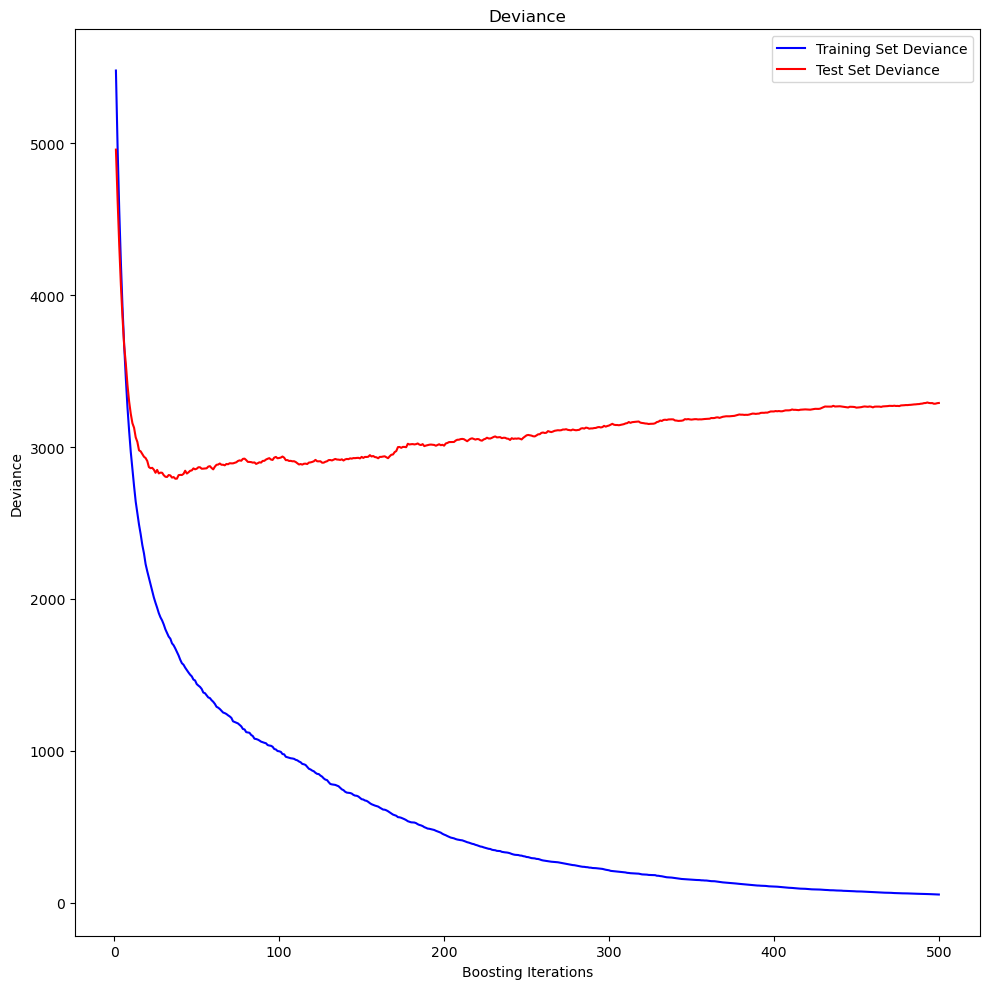

In [53]:
test_score = np.zeros((500), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(500) + 1, gbr.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(500)+ 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()